In [1]:
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt
from copy import deepcopy

from graph_tools import Graph
from laplacian_tools import Laplacian_Handler

# Original Graph

In [2]:
# waypoints = np.array([
#     [0, 0],
#     [10, 0],
#     [10, 10],
#     [0, 0],
#     [0, -10],
#     [10, -10],
#     [10, 0],
#     [0, 0],
#     [0, 10]
# ])
# waypoints = np.array([
#     [0, 0],
#     [0, 10],
#     [20, 10],
#     [20, 0],
#     [10, 0]
# ])
waypoints = np.array([
    [0, 0],
    [20, 0],
    [20, 10],
    [10, 10],
    [10, -10]
])

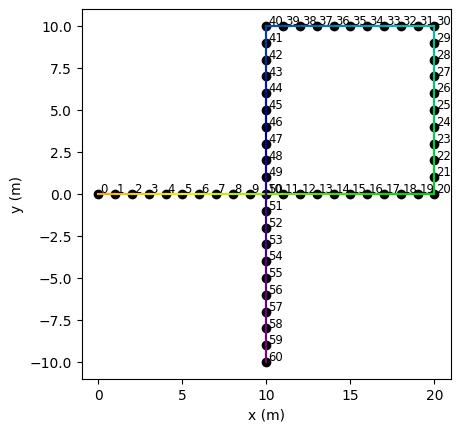

Laplacian: 41.00000000000119
0: 901.0000000000142
1: 860.0000000000148
2: 819.000000000015
3: 778.0000000000152
4: 737.0000000000152
5: 696.0000000000152
6: 655.000000000015
7: 614.0000000000146
8: 573.0000000000141
9: 532.0000000000136
10: 491.00000000001285
11: 529.000000000014
12: 565.0000000000151
13: 599.0000000000159
14: 631.0000000000168
15: 661.0000000000176
16: 689.0000000000182
17: 715.0000000000189
18: 739.0000000000193
19: 761.0000000000199
20: 781.0000000000205
21: 799.0000000000207
22: 815.0000000000211
23: 829.0000000000216
24: 841.0000000000217
25: 851.0000000000216
26: 859.0000000000217
27: 865.0000000000223
28: 869.0000000000224
29: 871.0000000000223
30: 871.000000000023
31: 869.0000000000234
32: 865.0000000000232
33: 859.0000000000232
34: 851.0000000000232
35: 841.0000000000227
36: 829.0000000000225
37: 815.0000000000223
38: 799.0000000000218
39: 781.000000000021
40: 761.0000000000206
41: 739.0000000000202
42: 715.0000000000194
43: 689.0000000000188
44: 661.000000000

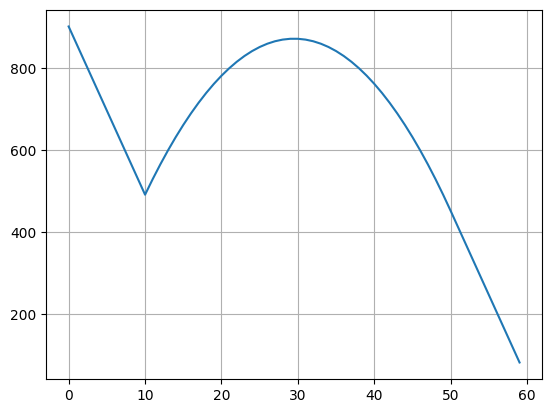

In [3]:
g = Graph(waypoints=waypoints)
g.plot()
l = Laplacian_Handler(g)
print(f"Laplacian: {l.lap_det}")
num_nodes = len(g.graph_keys)

# print(l.add_edge(73, 20))
lap_dets = []
for i in range(num_nodes-1):
    new_lap_det = l.simulate_add_edge(num_nodes-1, i)
    lap_dets.append(new_lap_det)
    print(f"{i}: {new_lap_det}")
    
print(f"Laplacian:\n")
np.set_printoptions(threshold=100000)
for i, row in enumerate(l.lap):
# for i, row in enumerate(g.adjacency_matrix()):
    print(f"{i}: {row}")
    
for i in g.graph_edges:
    print(f"{i}: {g.graph_edges[i]}")
    
for i, row in enumerate(g.laplacian()):
    assert np.sum(row) == 0, f"sum is not 1: {i}: {row}"
    
plt.plot(np.arange(num_nodes-1), lap_dets)
plt.grid(True)


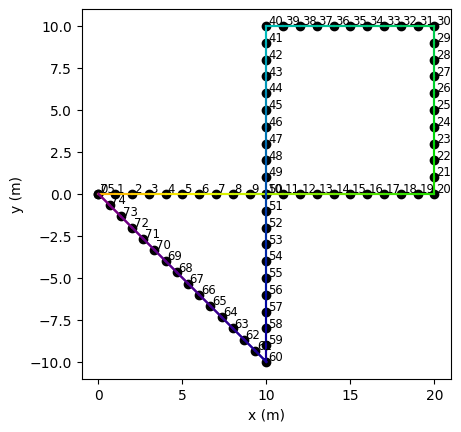

1516.0000000000218
(74, 74)
1516.000000000032


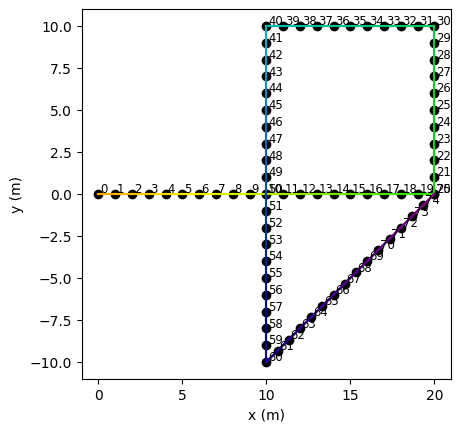

1395.999999999995
(74, 74)
1396.000000000038


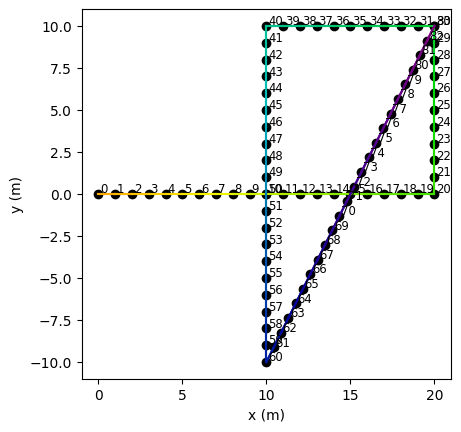

1814.0000000000268
(82, 82)
1814.0000000000505


In [4]:
for pt in np.array([[0., 0.], [20., 0.], [20., 10.]]):
    g_cp = deepcopy(g)
    g_cp.add_nodes_to_waypoint(pt)
    g_cp.plot()
    print(la.det(g_cp.reduced_laplacian()))
    print(l.simulate_traveling_to_waypoint(pt))
    

In [5]:
def simulate_add_edge(L_reduced, node1: int, node2: int) -> float:
    # column of reduced incidence matrix
    a_uv = np.zeros(len(L_reduced)) 
    # if either of the nodes are 0, a_uv contains only one 1
    if node1 - 1 >= 0:
        a_uv[node1 - 1] = -1
    if node2 - 1 >= 0:
        a_uv[node2 - 1] = 1
    print(a_uv[80:])
    return L_reduced + np.outer(a_uv, a_uv)


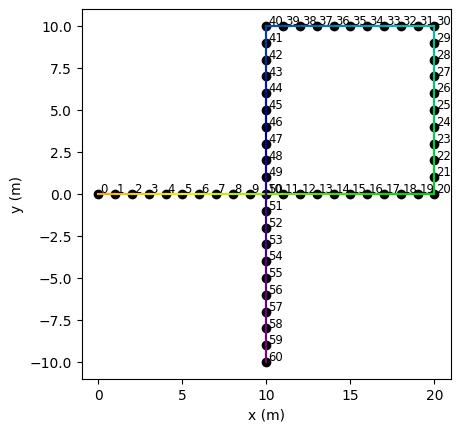

3.713572066704337


IndexError: index 84 is out of bounds for axis 0 with size 60

In [6]:
g = Graph(waypoints=waypoints)
g.plot()
lap = g.reduced_laplacian()
print(np.log(la.det(lap)))
l = Laplacian_Handler(g)
print(np.log(l.simulate_add_edge(85, 83)))
print(simulate_add_edge(g.reduced_laplacian(), 85, 83)[80:,80:])

g.add_edge(85, 83)
print(np.log(la.det(g.reduced_laplacian())))


print(g.reduced_laplacian()[80:,80:])
print((g.reduced_laplacian() - simulate_add_edge(g.reduced_laplacian(), 85, 83))[80:,80:])

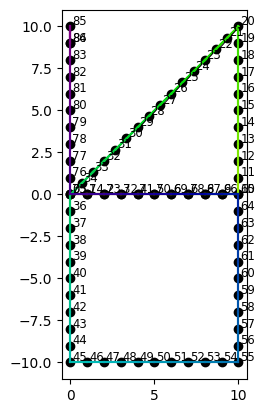

22.319972145775527


In [ ]:
waypoints_new = np.concatenate((waypoints, [[0, 9]]), axis=0)
g = Graph(waypoints=waypoints_new)
g.plot()
lap = g.reduced_laplacian()
print(np.log(la.det(lap)))